In [1]:
import numpy as np
from math import sqrt, atan, acos, pi, cos
import matplotlib.pyplot as plt
import nbkode
import plotly.express as px

In [2]:
def _rhs(t: float, x: np.ndarray, p: np.ndarray) -> np.ndarray:
    k, n_dim = p
    r = sqrt(sum(x[:n_dim]**2))
    return np.concatenate((x[n_dim:2*n_dim],
                    -k * x[:n_dim] / r**3))

In [3]:
def run_trajectory(n_dim: int, xv0: np.ndarray, k: float, ts: np.ndarray, solver_name = nbkode.Heun3) -> np.ndarray:
    assert len(xv0) == 2*n_dim, "Wrong number of dimensions"

    solver = solver_name(_rhs, 0., xv0, params=[k, n_dim])
    return solver.run(ts)

In [4]:
def run_2dtrajectory(d0: float, b: float, v0: float, k: float, ts: np.ndarray, solver_name = nbkode.Heun3) -> np.ndarray:
    assert v0 > 0, "Initial velocity must be positive."
    xv0_2d = [d0, b, -v0, 0.]
    return run_trajectory(2, xv0_2d, k, ts, solver_name=solver_name)

In [5]:
d0, b, v0 = 1.e5, 10., 1.
k = 1.

In [6]:
ts = np.linspace(0, 200_000, 10_000_000)
ts, vals = run_2dtrajectory(d0, b, v0, k, ts)
x2ds, y2ds, vx2ds, vy2ds = vals.T
r2ds = sum(x2ds**2 + y2ds**2)

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


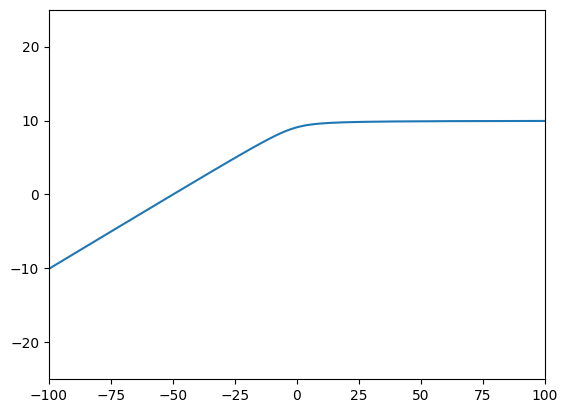

In [7]:
plt.plot(x2ds, y2ds)
plt.axis([-100, 100, -25, 25]);

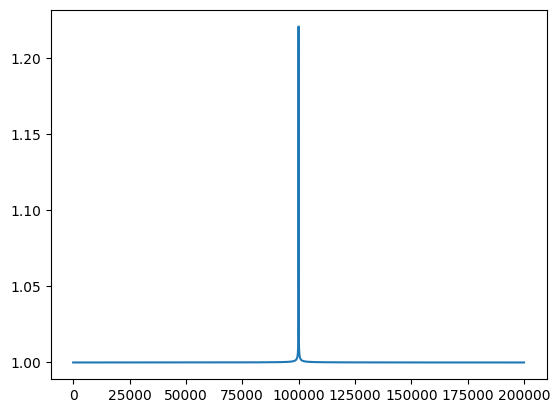

In [8]:
en = vx2ds ** 2 + vy2ds ** 2 - 2/r2ds
plt.plot(ts, en)

In [9]:
def get_2dtrajectory(d0: float, b: float, v0: float, k: float, n_points: int = 100) -> np.ndarray:
    semilatus = (v0 * b) ** 2 / k
    eccentricity = np.sqrt(v0**2 * semilatus / k  + 1)
    thetai = atan(b / d0)
    theta0 = thetai + np.sign(b)*acos(1/eccentricity * (semilatus / sqrt(d0**2 + b**2) - 1))

    thetas = np.linspace(thetai, 2*theta0 - thetai, n_points)
    rs_sol = semilatus / (1 + eccentricity*np.cos(thetas - theta0))
    return rs_sol * np.cos(thetas), rs_sol * np.sin(thetas)

In [26]:
thetai = atan(b / d0)
semilatus = (v0 * b) ** 2 / k
eccentricity = np.sqrt(v0**2 * semilatus / k  + 1)
theta0 = thetai + np.sign(b)*acos(1/eccentricity * (semilatus / sqrt(d0**2 + b**2) - 1))
Jbar = v0 * b

thetas = np.linspace(thetai, 2*theta0 - thetai, 1_000_000_000)

integrand = semilatus**2 / Jbar / (1 + eccentricity * np.cos(thetas-theta0))**2
np.trapz(integrand, thetas)

199982.20298268882

In [ ]:
xrange = np.linspave(0, 1, 1000)
np.trapz(xrange, xrange)

In [27]:
from scipy.integrate import quad

def dt(theta):
    return semilatus**2 / Jbar / (1+eccentricity*cos(theta-theta0))**2

def time_to(thetaf: float) ->
quad(dt, thetai, 2*theta0 - thetai)

(199982.20294527253, 8.116334806254621e-07)

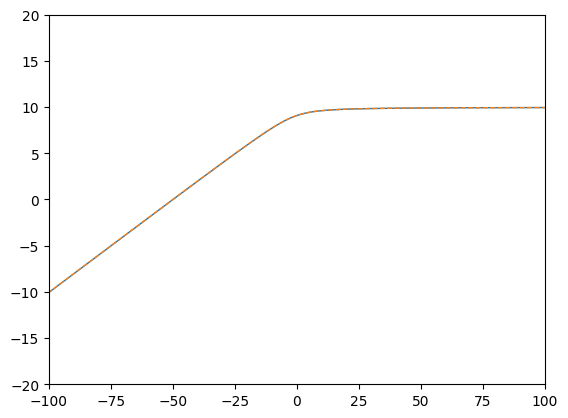

In [91]:
x2ds_sol, y2ds_sol = get_2dtrajectory(d0, b, v0, k)
plt.plot(x2ds, y2ds, linewidth=1)
plt.plot(x2ds_sol, y2ds_sol, linestyle='--', linewidth=1)
plt.axis([-100, 100, -20, 20]);

In [92]:
ts = np.linspace(0, 200_000, 10_000_000)
xv0 = [1.e5, 10., 5., -1., -0.1, 0.]
ts, vals = run_trajectory(3, xv0, k, ts)
xs, ys, zs, vxs, vys, vzs = vals.T

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


In [93]:
fig = px.line_3d(x=xs[::1_000], y=ys[::1_000], z=zs[::1_000])
fig.show()

In [ ]:
def rotation_matrix(xv0: np.ndarray) -> np.ndarray:
    n_vec = np.cross(xv0[:3], xv0[3:])
    